# Задача 2

In [2]:
%matplotlib inline
import numpy as np
import math as mt
import matplotlib
import matplotlib.pyplot as plt
from pylab import *
from scipy.stats import *

In [17]:
def GetParam():
    return uniform.rvs(loc=0, scale=0.4)

# Биномиальное распределение

In [26]:
N = 1000  # Размер выборки
K = 500  # Количество бутстрепных выборок
m = 50  # Известный параметр биномиального распределения
# my_p = GetParam()
my_p = 0.283179292013
print my_p

# Генерирую выборку
s_bin = binom.rvs(n=m, p=my_p, size=N)
# Заполняю массив эффективными оценками
ef_thetas = np.array([ mean(s_bin[:n])/m for n in range(1,N) ])

but_var_est = []  # Бутстрепная оценка дисперсии для эффективной оценки
an_est = []  # Бутстрепная оценка дисперсии для оценки X_1/m

fisher = np.array([ (ef_thetas[i-1]*(1-ef_thetas[i-1]))/(i*m) \
                                       for i in range(1,N) ])  # Записываю сюда информацию
                                                               # Фишера

for i in range(1,N):
    tmp_disp1 = []
    tmp_disp2 = []
    for j in range(K):
        s_but = binom.rvs(n=m, p=ef_thetas[i-1], size=i)
        tmp_disp1.append(mean(s_but)/m)
        tmp_disp2.append(float(s_but[0])/float(m))
    but_var_est.append(var(tmp_disp1))
    an_est.append(var(tmp_disp2))

0.283179292013


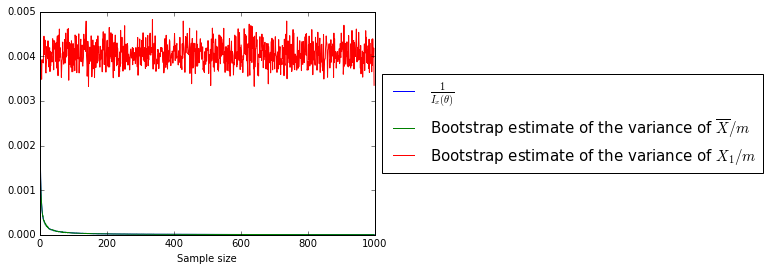

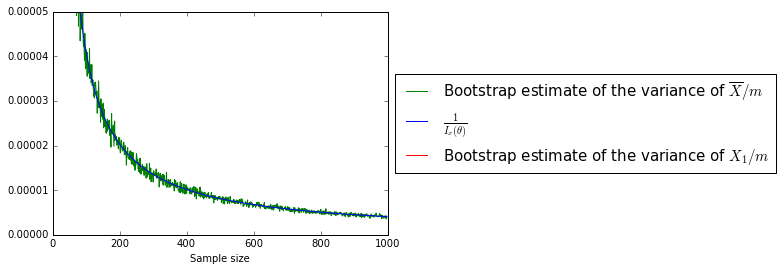

In [30]:
figure()
ylim(0, 0.005)
xlabel("Sample size")
plot(fisher, label="$\\frac{1}{I_x(\\theta)}$")
plot(but_var_est, label="Bootstrap estimate of the variance of $\overline{X}/m$")
plot(an_est, label="Bootstrap estimate of the variance of $X_1/m$")
legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
show()

figure()
ylim(0, 0.00005)
xlabel("Sample size")
plot(but_var_est, label="Bootstrap estimate of the variance of $\overline{X}/m$", color="g")
plot(fisher, label="$\\frac{1}{I_x(\\theta)}$", color="b")
plot(an_est, label="Bootstrap estimate of the variance of $X_1/m$", color="r")
legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
show()

# Нормальное распределение с неизвестной дисперсией

In [31]:
N = 1000  # Размер выборки
K = 500  # Количество бутстрепных выборок
a = 3  # Известный параметр нормального распределения
# my_sigma = GetParam()
my_sigma = 0.331072642015
print my_sigma

# Генерирую выборку
s_nor = norm.rvs(loc=a, scale=my_sigma, size=N)
# Заполняю массив эффективными оценками
ef_thetas = np.array([ mean((a-s_nor[:n])**2) for n in range(1,N) ])

but_var_est = []  # Бутстрепная оценка дисперсии для эффективной оценки
an_est = []  # Бутстрепная оценка дисперсии для оценки median(X)

fisher = np.array([ (2*(ef_thetas[i-1]**2))/i \
                           for i in range(1,N) ])  # Записываю сюда информацию
                                                   # Фишера

for i in range(1,N):
    tmp_disp1 = []
    tmp_disp2 = []
    for j in range(K):
        s_but = norm.rvs(loc=a, scale=ef_thetas[i-1], size=i)
        tmp_disp1.append(mean((a-s_but)**2))
        tmp_disp2.append(median(s_but))
    but_var_est.append(var(tmp_disp1))
    an_est.append(var(tmp_disp2))

0.331072642015


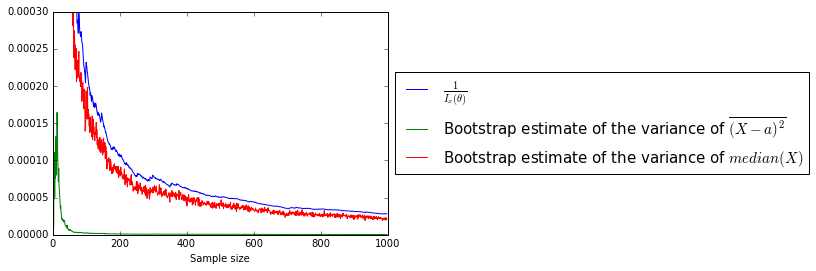

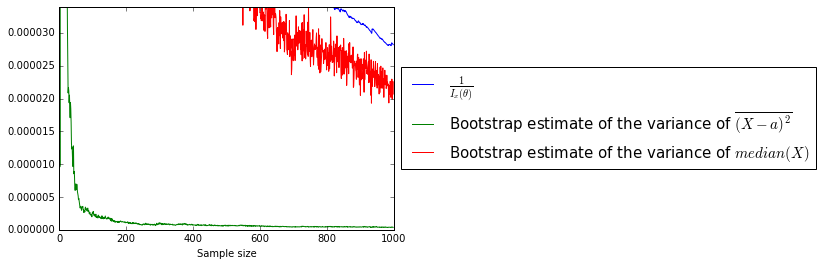

In [33]:
figure()
ylim(0, 0.0003)
xlabel("Sample size")
plot(fisher, label="$\\frac{1}{I_x(\\theta)}$")
plot(but_var_est, label="Bootstrap estimate of the variance of $\overline{(X-a)^2}$")
plot(an_est, label="Bootstrap estimate of the variance of $median(X)$")
legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
show()

figure()
ylim(0, 0.000034)
xlabel("Sample size")
plot(fisher, label="$\\frac{1}{I_x(\\theta)}$")
plot(but_var_est, label="Bootstrap estimate of the variance of $\overline{(X-a)^2}$")
plot(an_est, label="Bootstrap estimate of the variance of $median(X)$")
legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
show()

# Нормальное распределение с неизвестным математическим ожиданием

In [34]:
N = 1000  # Размер выборки
K = 500  # Количество бутстрепных выборок
sigma = 2.1  # Известный параметр нормального распределения
# my_a = GetParam()
my_a = 0.156829809344
print my_a

# Генерирую выборку
s_nor = norm.rvs(loc=my_a, scale=sigma, size=N)
# Заполняю массив эффективными оценками
ef_thetas = np.array([ mean(s_nor[:n]) for n in range(1,N) ])

but_var_est = []  # Бутстрепная оценка дисперсии для эффективной оценки
an_est = []  # Бутстрепная оценка дисперсии для оценки median(X)

fisher = np.array([ sigma/i for i in range(1,N) ]) # Записываю сюда информацию
                                                   # Фишера

for i in range(1,N):
    tmp_disp1 = []
    tmp_disp2 = []
    for j in range(K):
        s_but = norm.rvs(loc=ef_thetas[i-1], scale=sigma, size=i)
        tmp_disp1.append(mean(s_but))
        tmp_disp2.append(median(s_but))
    but_var_est.append(var(tmp_disp1))
    an_est.append(var(tmp_disp2))

0.156829809344


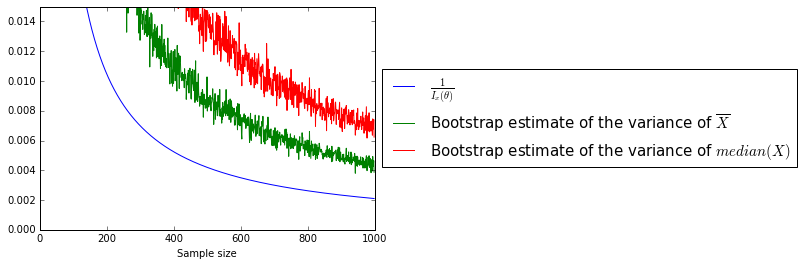

In [35]:
figure()
ylim(0, 0.015)
xlabel("Sample size")
plot(fisher, label="$\\frac{1}{I_x(\\theta)}$")
plot(but_var_est, label="Bootstrap estimate of the variance of $\overline{X}$")
plot(an_est, label="Bootstrap estimate of the variance of $median(X)$")
legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
show()

# Экспоненциальное распределение

In [36]:
N = 1000  # Размер выборки
K = 500  # Количество бутстрепных выборок
# theta = GetParam()
theta = 0.371160354779
print theta

# Генерирую выборку
s_exp = expon.rvs(scale=theta, size=N)
# Заполняю массив эффективными оценками
ef_thetas = np.array([ mean(s_exp[:n]) for n in range(1,N) ])

but_var_est = []  # Бутстрепная оценка дисперсии для эффективной оценки
an_est = []  # Бутстрепная оценка дисперсии для "другой" оценки

fisher = np.array([ (ef_thetas[i-1]**2)/i \
                   for i in range(1,N) ])  # Записываю сюда информацию
                                           # Фишера

for i in range(1,N):
    tmp_disp1 = []
    tmp_disp2 = []
    for j in range(K):
        s_but = norm.rvs(scale=ef_thetas[i-1], size=i)
        tmp_disp1.append(mean(s_but))
        tmp_disp2.append((1/(2*mean(s_but)))+(i/(2*min(s_but))))
    but_var_est.append(var(tmp_disp1))
    an_est.append(var(tmp_disp2))

0.371160354779


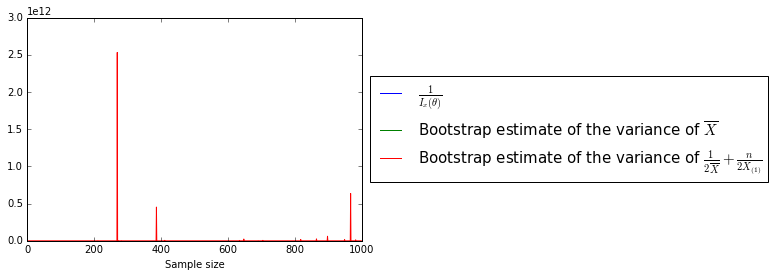

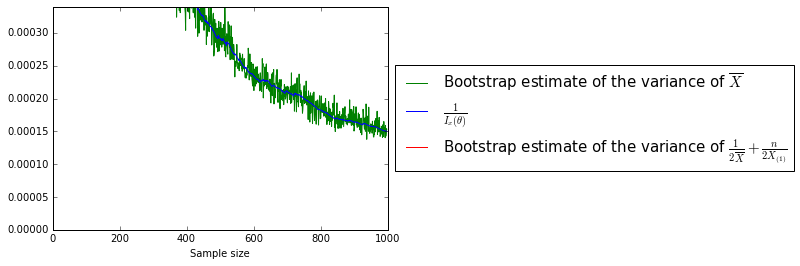

In [39]:
figure()
xlabel("Sample size")
plot(fisher, label="$\\frac{1}{I_x(\\theta)}$")
plot(but_var_est, label="Bootstrap estimate of the variance of $\overline{X}$")
plot(an_est, label="Bootstrap estimate of the variance of $\\frac{1}{2\overline{X}}+\\frac{n}{2X_{(1)}}$")
legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
show()

figure()
ylim(0, 0.00034)
xlabel("Sample size")
plot(but_var_est, label="Bootstrap estimate of the variance of $\overline{X}$", color="g")
plot(fisher, label="$\\frac{1}{I_x(\\theta)}$", color="b")
plot(an_est, label="Bootstrap estimate of the variance of $\\frac{1}{2\overline{X}}+\\frac{n}{2X_{(1)}}$", color="r")
legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
show()